In [14]:
import trimesh as tm
from data.preprocess import sample_and_compute_features
import os
import pyvista as pv

# Check the size of mesh data before preprocess

Set directory

In [2]:
dataroot = 'G:/dataset/MCB_B/MCB_B/'
namelist='E:/ARIH/3D_modeling/tools/train_all.txt'

In [10]:
min_size = 500
max_size = 10000
min_face = 50
max_face = 1000

with open(namelist,'r') as f:
    for model_name in f:
        model_name = dataroot + model_name.strip('\n')
        file_stats = os.stat(model_name)
        if file_stats.st_size < min_size:
            min_size = file_stats.st_size
        if file_stats.st_size > max_size:
            max_size = file_stats.st_size

        model = tm.load(model_name)
        nfaces = len(model.faces)
        if nfaces < min_face:
            min_face = nfaces
        if nfaces > max_face:
            max_face = nfaces

        if (nfaces < 30) or (nfaces > 1000000):
            print(model_name)

        

G:/dataset/MCB_B/MCB_B/train/disc/00001302.obj
G:/dataset/MCB_B/MCB_B/train/motor/00064764.obj
G:/dataset/MCB_B/MCB_B/train/pin/00000594.obj
G:/dataset/MCB_B/MCB_B/train/pin/00000926.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000028.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000029.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000032.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000065.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000077.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000116.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000173.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000188.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000215.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000262.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000264.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000290.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000300.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000374.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000396.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000567.obj
G:/dataset/MCB_B/MCB_B/train/plate/00000576.o

In [12]:
min_size, max_size/(1024*1024), min_face, max_face

(175, 142.1143503189087, 4, 3539800)

In [13]:
from options.opt import Opt
opt = Opt() 

Number of faces before process is 26
Number of faces after process is 416
Number of faces before process is 12
Number of faces after process is 498
Number of faces before process is 28
Number of faces after process is 448
Number of faces before process is 726
Number of faces after process is 498
Number of faces before process is 1510028
Number of faces after process is 497
Number of faces before process is 2066594
Number of faces after process is 500


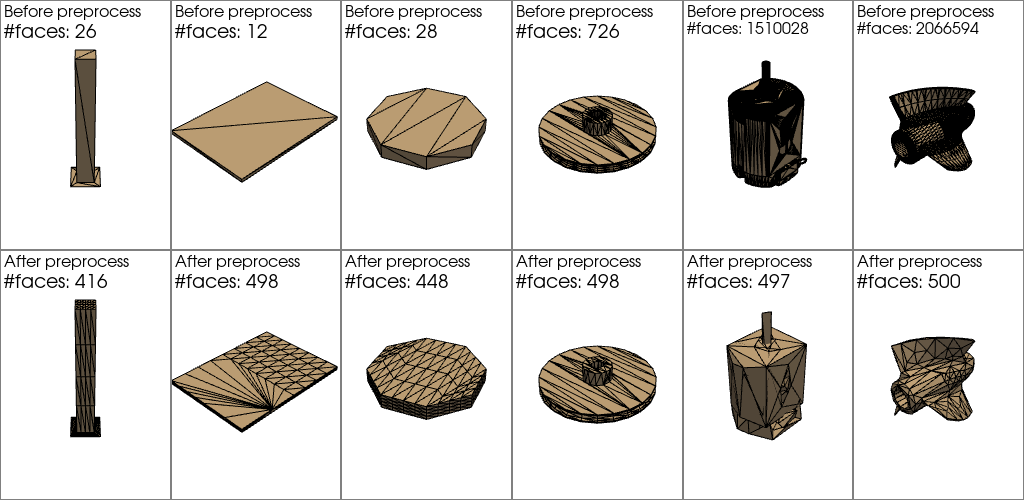

In [37]:
model_names = ['G:/dataset/MCB_B/MCB_B/train/pin/00000926.obj',
    'G:/dataset/MCB_B/MCB_B/train/plate/00000567.obj',
'G:/dataset/MCB_B/MCB_B/train/disc/00001302.obj',
'G:/dataset/MCB_B/MCB_B/train/pulley/00053366.obj',
'G:/dataset/MCB_B/MCB_B/train/motor/00064764.obj',
'G:/dataset/MCB_B/MCB_B/train/rotor/00063561.obj']

opt.t_pp, opt.t_ef = 0, 0
font_size = 12

p = pv.Plotter(shape=(2, len(model_names)), window_size=[1024, 500], border_color='gray')
p.set_background('white')
for i, model_name in enumerate(model_names):
    mesh_in = tm.load(model_name)

    print("Number of faces before process is %d"%(len(mesh_in.faces)))
    mesh_pv, meshcnn_data = sample_and_compute_features(mesh_in, model_name, opt)
    print("Number of faces after process is %d"%(len(mesh_pv.faces)//4))

    p.subplot(0, i)
    p.add_text("Before preprocess\n", font_size=font_size, color='black')
    p.add_text("\n#faces: {}".format(len(mesh_in.faces)), font_size=font_size, color='black')
    p.add_mesh(mesh_in, color="tan", show_edges=True)
    p.subplot(1, i)
    p.add_text("After preprocess\n", font_size=font_size, color='black')
    p.add_text("\n#faces: {}".format(len(mesh_pv.faces)//4), font_size=font_size, color='black')
    p.add_mesh(mesh_pv, color="tan", show_edges=True)
    
p.show()

# Check different methods of decimation
## load data

In [1]:
import json
dataroot = 'G:/dataset/MCB_B/MCB_B/'
namelist_file = 'G:/dataset/MCB_B/MCB_B/namelist/mcbb_5c1000s.json'
names = []
with open(namelist_file, 'r') as f:
    namelist = json.load(f)
    for phase in ['train', 'test']:
        dataset = namelist[phase]
        classes = list(dataset.keys())
        for target in classes:
            items = [os.path.join(dataroot, x)\
                for x in dataset[target]]
            names += items

In [3]:
import trimesh as tm

mesh_in = tm.load(names[0])
print('Before: #faces %d, #vertices %d'%(len(mesh_in.faces), len(mesh_in.vertices)))

Before: #faces 3720, #vertices 1848


In [ ]:
import pyvista as pv
p = pv.Plotter(shape=(2, 1))
p.subplot(0, 0)
p.add_mesh(mesh_in, color="tan", show_edges=True)
p.subplot(1, 0)
p.add_mesh(mesh_out, color="tan", show_edges=True)
p.show()

## Sample by Open3D

In [4]:
import open3d as o3d
mesh_in = o3d.io.read_triangle_mesh(names[0])
mesh_in

TriangleMesh with 11160 points and 3720 triangles.

In [30]:
mesh_out = mesh_in.simplify_quadric_decimation(500)
mesh_out

TriangleMesh with 4763 points and 500 triangles.

## Sample by pySimplify


In [4]:

from pySimplify import pySimplify
mesh_in = tm.load(names[0])
mesh_out1 = mesh_in.simplify_quadratic_decimation(500)
simplify = pySimplify()
simplify.setMesh(mesh_in)
simplify.simplify_mesh(target_count = 500, preserve_border=True)
mesh_out2 = simplify.getMesh()



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
simplified mesh in 0.0813 seconds 


In [5]:
import pyvista as pv
p = pv.Plotter(shape=(3, 1))
p.subplot(0, 0)
p.add_mesh(mesh_in, color="tan", show_edges=True)
p.subplot(1, 0)
p.add_mesh(mesh_out1, color="tan", show_edges=True)
p.subplot(2, 0)
p.add_mesh(mesh_out2, color="tan", show_edges=True)
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [6]:
mesh_out2

<trimesh.Trimesh(vertices.shape=(742, 3), faces.shape=(1508, 3))>

In [7]:
mesh_out1

<trimesh.Trimesh(vertices.shape=(240, 3), faces.shape=(500, 3))>